In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

In [132]:
def data_processing(filename):
    ship_data = pd.read_csv(filename)

    # print metadata and
#    print(ship_data.head())
#    print(list(ship_data.columns))
    print(ship_data.describe())
    
    print(ship_data.isna().sum())
    ship_data = ship_data.dropna()

    ship_data.hist(bins=30, figsize=(25, 15))
    return ship_data

In [133]:
#ship_data

In [134]:
def data_thresold(df, column_name, threshod, symbol):
    if symbol == "<": 
        df = df[df[column_name] < threshod]
    elif symbol == ">": 
        df = df[df[column_name] > threshod]
    else:
        print("Only > and < symbols are supported")
    return df

In [135]:
def data_drop_columns(df, column_names):
    df = df.drop(columns=column_names)
    return df

In [136]:
#ship_data = data_drop_columns(ship_data, 'Time')
#ship_data

               Time  Main Engine Fuel Consumption (MT/day)  \
count  1.624800e+04                           16085.000000   
mean   1.528599e+09                              17.179945   
std    1.689171e+07                              20.759673   
min    1.499347e+09                             -22.565517   
25%    1.513972e+09                              -0.048000   
50%    1.528594e+09                              15.921970   
75%    1.543231e+09                              39.784802   
max    1.557845e+09                              49.090823   

       Main Engine Using HFO (bool)  Main Engine Using MGO (bool)  \
count                  16085.000000                  16085.000000   
mean                       0.816402                      0.174174   
std                        0.386716                      0.378761   
min                        0.000000                      0.000000   
25%                        1.000000                      0.000000   
50%                        

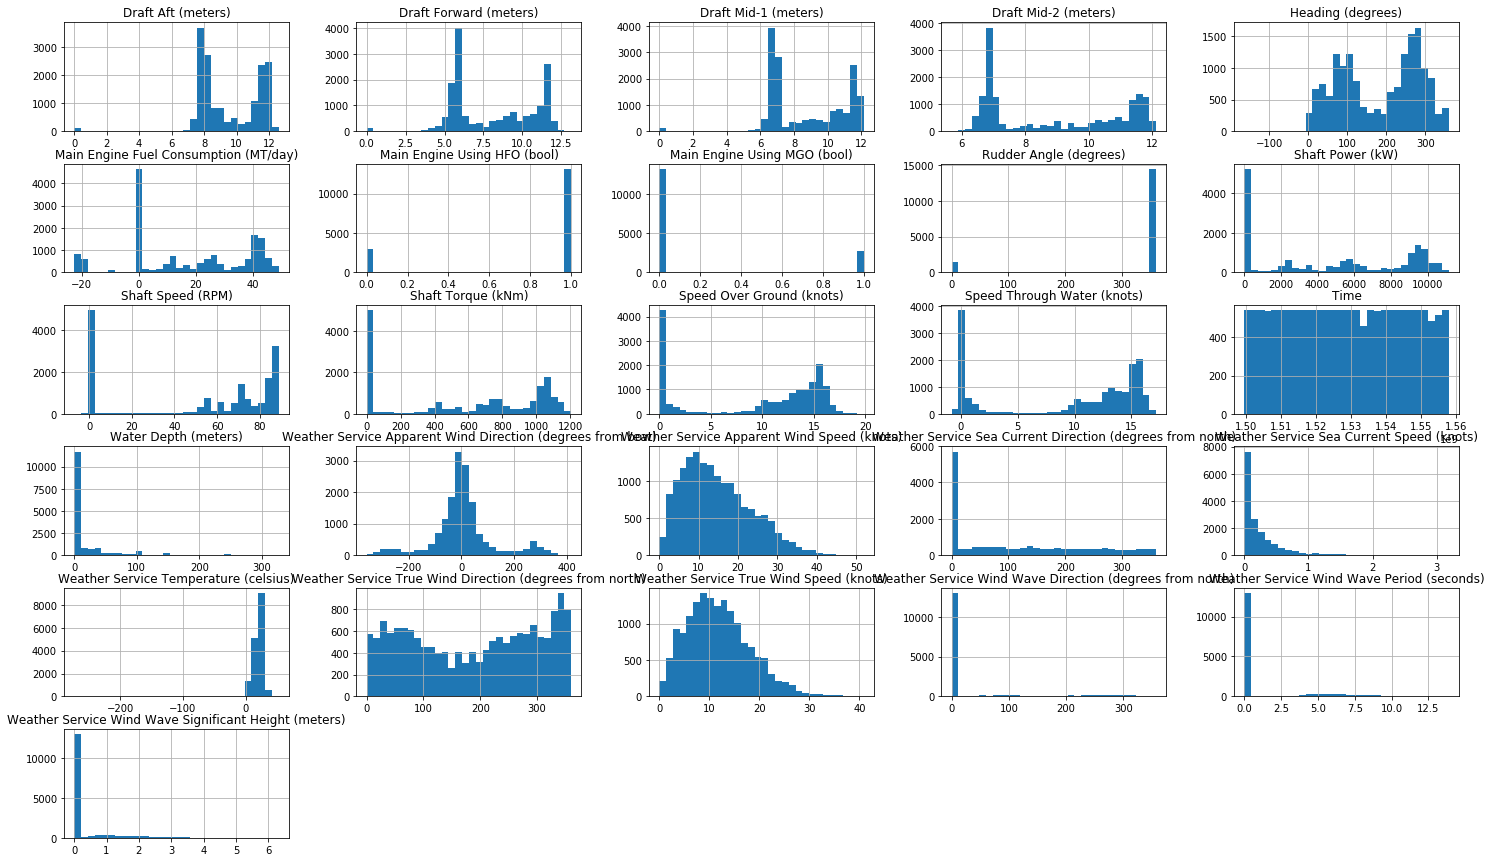

In [137]:
ship_data = data_processing("ship_data.csv")

In [138]:
#ship_data

In [139]:
ship_data = data_thresold(ship_data, "Main Engine Fuel Consumption (MT/day)", 0, ">")
ship_data = data_thresold(ship_data, "Weather Service Temperature (celsius)", -100, ">")

In [140]:
ship_data = data_drop_columns(ship_data, ['Time','Shaft Power (kW)','Shaft Torque (kNm)','Shaft Speed (RPM)','Main Engine Using MGO (bool)','Shaft Torque (kNm)'])
ship_data

,Main Engine Fuel Consumption (MT/day),Main Engine Using HFO (bool),Draft Forward (meters),Draft Aft (meters),Draft Mid-1 (meters),Draft Mid-2 (meters),Speed Over Ground (knots),Speed Through Water (knots),Heading (degrees),Rudder Angle (degrees),...,Weather Service Apparent Wind Direction (degrees from bow),Weather Service True Wind Speed (knots),Weather Service True Wind Direction (degrees from north),Weather Service Temperature (celsius),Weather Service Sea Current Direction (degrees from north),Weather Service Sea Current Speed (knots),Water Depth (meters),Weather Service Wind Wave Significant Height (meters),Weather Service Wind Wave Period (seconds),Weather Service Wind Wave Direction (degrees from north)
120,41.425078,1.0,11.649717,11.799836,11.571744,11.474694,15.927469,15.807160,99.148003,358.071607,...,-3.418403e+00,5.573875,285.539831,25.161969,248.353210,0.237554,0.000000,0.0,0.0,0.0
121,41.201985,1.0,11.648145,11.787190,11.564664,11.485278,15.448288,15.753783,86.778544,359.080607,...,-4.492690e+00,7.279205,271.855120,25.328048,248.870589,0.241738,0.000000,0.0,0.0,0.0
122,41.173734,1.0,11.651354,11.790422,11.557041,11.495959,15.388052,15.852655,86.329889,358.628799,...,-1.852434e+01,9.389550,279.183060,25.932167,0.000000,0.000000,0.000000,0.0,0.0,0.0
123,41.049703,1.0,11.649094,11.803183,11.557006,11.497167,15.399533,16.067271,87.081565,358.557335,...,-6.293312e-01,8.170528,267.638437,29.833849,0.000000,0.000000,0.000000,0.0,0.0,0.0
124,41.362789,1.0,11.637952,11.795997,11.541174,11.510174,15.518798,15.917059,85.922376,359.203618,...,1.058912e+01,7.215569,253.231194,30.717468,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16238,18.579409,0.0,9.136224,9.305685,8.715799,8.816964,10.958465,10.850855,159.720221,359.332886,...,0.000000e+00,0.000000,180.000000,0.000000,0.000000,0.000000,7.527669,0.0,0.0,0.0
16239,8.983119,0.0,8.871877,9.019253,8.737814,8.826784,8.139633,8.003758,85.148636,1.256275,...,-1.421085e-14,0.000000,180.000000,0.000000,0.000000,0.000000,10.232598,0.0,0.0,0.0
16240,7.371837,0.0,8.814720,8.947444,8.734764,8.825217,7.319914,7.301057,79.026720,0.111841,...,1.421085e-14,0.000000,180.000000,0.000000,0.000000,0.000000,15.305524,0.0,0.0,0.0
16241,1.968086,0.0,8.763339,8.777636,8.745652,8.857950,1.493422,1.284342,74.796703,359.854918,...,2.842171e-14,0.000000,180.000000,0.000000,0.000000,0.000000,15.611660,0.0,0.0,0.0


In [ ]:
#ship_data = ship_data.drop(columns=['Weather Service True Wind Speed (knots)','Weather Service True Wind Speed (knots)'])
#ship_data = ship_data.drop(columns=['Weather Service Wind Wave Period (seconds)','Weather Service Wind Wave Direction (degrees from north)','Weather Service Wind Wave Significant Height (meters)','Weather Service True Wind Direction (degrees from north)'])
#ship_data = ship_data.drop(columns=['Rudder Angle (degrees)','Water Depth (meters)'])
ship_data = ship_data.drop(columns=['Time','Shaft Power (kW)','Shaft Torque (kNm)','Shaft Speed (RPM)','Main Engine Using MGO (bool)','Shaft Torque (kNm)'])
ship_data

In [59]:
ship_data = pd.read_csv("ship_data.csv")
ship_data.head()

,Time,Main Engine Fuel Consumption (MT/day),Main Engine Using HFO (bool),Main Engine Using MGO (bool),Draft Forward (meters),Draft Aft (meters),Draft Mid-1 (meters),Draft Mid-2 (meters),Shaft Speed (RPM),Shaft Torque (kNm),...,Weather Service Apparent Wind Direction (degrees from bow),Weather Service True Wind Speed (knots),Weather Service True Wind Direction (degrees from north),Weather Service Temperature (celsius),Weather Service Sea Current Direction (degrees from north),Weather Service Sea Current Speed (knots),Water Depth (meters),Weather Service Wind Wave Significant Height (meters),Weather Service Wind Wave Period (seconds),Weather Service Wind Wave Direction (degrees from north)
0,1499346900,0.0,0.0,0.0,0.0,0.0,0.0,11.497695,84.878837,1013.631639,...,20.425315,6.675341,314.224434,20.283071,254.033533,0.070896,0.0,0.0,0.0,0.0
1,1499349600,0.0,0.0,0.0,0.0,0.0,0.0,11.509352,84.868300,1004.244559,...,23.426522,7.034934,308.615477,20.360865,323.890575,0.006596,0.0,0.0,0.0,0.0
2,1499353200,0.0,0.0,0.0,0.0,0.0,0.0,11.531678,84.874972,1003.751648,...,22.396432,7.778714,303.563221,20.534437,22.703059,0.027087,0.0,0.0,0.0,0.0
3,1499356800,0.0,0.0,0.0,0.0,0.0,0.0,11.545624,84.867446,1010.716545,...,8.588757,8.508143,300.737464,20.641539,347.948256,0.034555,0.0,0.0,0.0,0.0
4,1499360400,0.0,0.0,0.0,0.0,0.0,0.0,11.549795,84.864535,1013.179696,...,-15.548513,8.541664,302.903406,20.662176,217.495117,0.029501,0.0,0.0,0.0,0.0


In [60]:
list(ship_data.columns)

['Time',
 'Main Engine Fuel Consumption (MT/day)',
 'Main Engine Using HFO (bool)',
 'Main Engine Using MGO (bool)',
 'Draft Forward (meters)',
 'Draft Aft (meters)',
 'Draft Mid-1 (meters)',
 'Draft Mid-2 (meters)',
 'Shaft Speed (RPM)',
 'Shaft Torque (kNm)',
 'Shaft Power (kW)',
 'Speed Over Ground (knots)',
 'Speed Through Water (knots)',
 'Heading (degrees)',
 'Rudder Angle (degrees)',
 'Weather Service Apparent Wind Speed (knots)',
 'Weather Service Apparent Wind Direction (degrees from bow)',
 'Weather Service True Wind Speed (knots)',
 'Weather Service True Wind Direction (degrees from north)',
 'Weather Service Temperature (celsius)',
 'Weather Service Sea Current Direction (degrees from north)',
 'Weather Service Sea Current Speed (knots)',
 'Water Depth (meters)',
 'Weather Service Wind Wave Significant Height (meters)',
 'Weather Service Wind Wave Period (seconds)',
 'Weather Service Wind Wave Direction (degrees from north)']

In [61]:
ship_data.describe()

,Time,Main Engine Fuel Consumption (MT/day),Main Engine Using HFO (bool),Main Engine Using MGO (bool),Draft Forward (meters),Draft Aft (meters),Draft Mid-1 (meters),Draft Mid-2 (meters),Shaft Speed (RPM),Shaft Torque (kNm),...,Weather Service Apparent Wind Direction (degrees from bow),Weather Service True Wind Speed (knots),Weather Service True Wind Direction (degrees from north),Weather Service Temperature (celsius),Weather Service Sea Current Direction (degrees from north),Weather Service Sea Current Speed (knots),Water Depth (meters),Weather Service Wind Wave Significant Height (meters),Weather Service Wind Wave Period (seconds),Weather Service Wind Wave Direction (degrees from north)
count,1.624800e+04,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,...,16248.000000,16248.000000,16248.000000,16248.000000,16248.000000,16248.000000,16085.000000,16248.000000,16248.000000,16248.000000
mean,1.528599e+09,17.179945,0.816402,0.174174,8.052928,9.525583,8.787620,8.887144,50.942299,576.631633,...,7.484982,11.909791,188.379540,20.651950,112.882933,0.250273,20.400153,0.321751,1.274072,35.769283
std,1.689171e+07,20.759673,0.386716,0.378761,2.647701,1.916526,2.245241,2.106680,36.677181,444.516021,...,117.528896,6.378396,112.982942,13.664512,115.710276,0.391490,46.504387,0.798840,2.761031,85.377022
min,1.499347e+09,-22.565517,0.000000,0.000000,0.000000,0.000000,0.000000,5.681231,-7.110332,-0.001360,...,-358.561592,0.000000,0.000568,-273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.513972e+09,-0.048000,1.000000,0.000000,5.781886,7.949893,6.832548,6.854086,0.000000,7.389395,...,-37.711293,7.239715,79.364749,16.403763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.528594e+09,15.921970,1.000000,0.000000,7.274986,8.912419,8.144924,8.296719,69.724570,711.673578,...,-0.059869,11.244075,200.619218,22.491905,78.894714,0.117644,0.000000,0.000000,0.000000,0.000000
75%,1.543231e+09,39.784802,1.000000,0.000000,10.929679,11.550329,11.264766,11.310986,85.457891,1025.661962,...,38.924793,15.793592,292.159280,26.833620,208.182245,0.323779,13.937096,0.000000,0.000000,0.000000
max,1.557845e+09,49.090823,1.000000,1.000000,13.136587,12.589208,12.132386,12.127948,88.959431,1206.091541,...,484.746911,40.845838,359.997076,52.559168,359.999716,3.184603,326.803230,6.323284,13.873590,357.472397


In [62]:
ship_data.isna().sum()

Time                                                            0
Main Engine Fuel Consumption (MT/day)                         163
Main Engine Using HFO (bool)                                  163
Main Engine Using MGO (bool)                                  163
Draft Forward (meters)                                        163
Draft Aft (meters)                                            163
Draft Mid-1 (meters)                                          163
Draft Mid-2 (meters)                                          163
Shaft Speed (RPM)                                             163
Shaft Torque (kNm)                                            163
Shaft Power (kW)                                              163
Speed Over Ground (knots)                                     163
Speed Through Water (knots)                                   163
Heading (degrees)                                               8
Rudder Angle (degrees)                                        163
Weather Se

In [63]:
ship_data = ship_data.dropna()

In [64]:
ship_data.isna().sum()

Time                                                          0
Main Engine Fuel Consumption (MT/day)                         0
Main Engine Using HFO (bool)                                  0
Main Engine Using MGO (bool)                                  0
Draft Forward (meters)                                        0
Draft Aft (meters)                                            0
Draft Mid-1 (meters)                                          0
Draft Mid-2 (meters)                                          0
Shaft Speed (RPM)                                             0
Shaft Torque (kNm)                                            0
Shaft Power (kW)                                              0
Speed Over Ground (knots)                                     0
Speed Through Water (knots)                                   0
Heading (degrees)                                             0
Rudder Angle (degrees)                                        0
Weather Service Apparent Wind Speed (kno

In [65]:
ship_data

,Time,Main Engine Fuel Consumption (MT/day),Main Engine Using HFO (bool),Main Engine Using MGO (bool),Draft Forward (meters),Draft Aft (meters),Draft Mid-1 (meters),Draft Mid-2 (meters),Shaft Speed (RPM),Shaft Torque (kNm),...,Weather Service Apparent Wind Direction (degrees from bow),Weather Service True Wind Speed (knots),Weather Service True Wind Direction (degrees from north),Weather Service Temperature (celsius),Weather Service Sea Current Direction (degrees from north),Weather Service Sea Current Speed (knots),Water Depth (meters),Weather Service Wind Wave Significant Height (meters),Weather Service Wind Wave Period (seconds),Weather Service Wind Wave Direction (degrees from north)
0,1499346900,0.000000,0.0,0.0,0.000000,0.000000,0.000000,11.497695,84.878837,1013.631639,...,2.042532e+01,6.675341,314.224434,20.283071,254.033533,0.070896,0.000000,0.0,0.0,0.0
1,1499349600,0.000000,0.0,0.0,0.000000,0.000000,0.000000,11.509352,84.868300,1004.244559,...,2.342652e+01,7.034934,308.615477,20.360865,323.890575,0.006596,0.000000,0.0,0.0,0.0
2,1499353200,0.000000,0.0,0.0,0.000000,0.000000,0.000000,11.531678,84.874972,1003.751648,...,2.239643e+01,7.778714,303.563221,20.534437,22.703059,0.027087,0.000000,0.0,0.0,0.0
3,1499356800,0.000000,0.0,0.0,0.000000,0.000000,0.000000,11.545624,84.867446,1010.716545,...,8.588757e+00,8.508143,300.737464,20.641539,347.948256,0.034555,0.000000,0.0,0.0,0.0
4,1499360400,0.000000,0.0,0.0,0.000000,0.000000,0.000000,11.549795,84.864535,1013.179696,...,-1.554851e+01,8.541664,302.903406,20.662176,217.495117,0.029501,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16243,1557831600,-0.104389,0.0,1.0,8.726591,8.777207,8.753742,8.863745,0.000000,2.883349,...,0.000000e+00,0.000000,180.000000,0.000000,0.000000,0.000000,14.995446,0.0,0.0,0.0
16244,1557835200,-0.106359,0.0,1.0,8.714152,8.775698,8.761056,8.857463,0.000000,2.265865,...,-2.842171e-14,0.000000,180.000000,0.000000,0.000000,0.000000,15.000000,0.0,0.0,0.0
16245,1557838800,-0.113656,0.0,1.0,8.639662,8.829447,8.787306,8.828243,0.000000,2.277010,...,0.000000e+00,0.000000,180.000000,0.000000,0.000000,0.000000,15.000000,0.0,0.0,0.0
16246,1557842400,-0.147364,0.0,1.0,8.706126,8.857078,8.882388,8.830731,0.000000,2.242062,...,5.846950e+00,0.000000,180.000000,0.000000,0.000000,0.000000,14.807075,0.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe18907a240>,
      dtype=object)

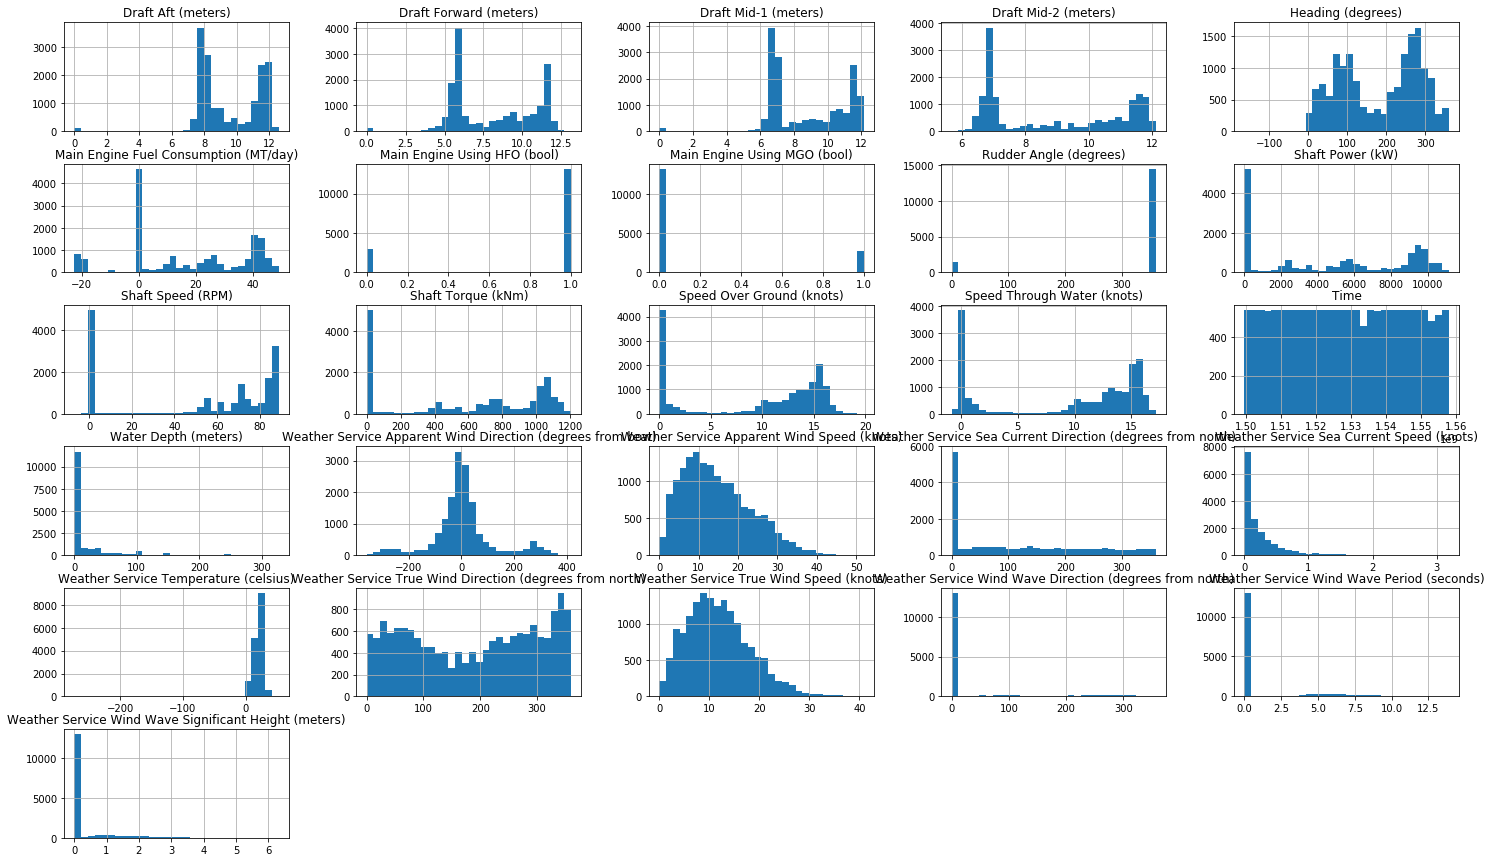

In [66]:
ship_data.hist(bins=30, figsize=(25, 15))

In [67]:
#features = pd.get_dummies(ship_data['Main Engine Using HFO (bool)'])
#features

In [68]:
ship_data = ship_data[ship_data["Main Engine Fuel Consumption (MT/day)"] > 0]
ship_data = ship_data[ship_data["Weather Service Temperature (celsius)"] > -100]

In [69]:
#ship_data = ship_data.drop(columns=['Weather Service True Wind Speed (knots)','Weather Service True Wind Speed (knots)'])
#ship_data = ship_data.drop(columns=['Weather Service Wind Wave Period (seconds)','Weather Service Wind Wave Direction (degrees from north)','Weather Service Wind Wave Significant Height (meters)','Weather Service True Wind Direction (degrees from north)'])
#ship_data = ship_data.drop(columns=['Rudder Angle (degrees)','Water Depth (meters)'])
ship_data = ship_data.drop(columns=['Time','Shaft Power (kW)','Shaft Torque (kNm)','Shaft Speed (RPM)','Main Engine Using MGO (bool)','Shaft Torque (kNm)'])
ship_data

,Main Engine Fuel Consumption (MT/day),Main Engine Using HFO (bool),Draft Forward (meters),Draft Aft (meters),Draft Mid-1 (meters),Draft Mid-2 (meters),Speed Over Ground (knots),Speed Through Water (knots),Heading (degrees),Rudder Angle (degrees),...,Weather Service Apparent Wind Direction (degrees from bow),Weather Service True Wind Speed (knots),Weather Service True Wind Direction (degrees from north),Weather Service Temperature (celsius),Weather Service Sea Current Direction (degrees from north),Weather Service Sea Current Speed (knots),Water Depth (meters),Weather Service Wind Wave Significant Height (meters),Weather Service Wind Wave Period (seconds),Weather Service Wind Wave Direction (degrees from north)
120,41.425078,1.0,11.649717,11.799836,11.571744,11.474694,15.927469,15.807160,99.148003,358.071607,...,-3.418403e+00,5.573875,285.539831,25.161969,248.353210,0.237554,0.000000,0.0,0.0,0.0
121,41.201985,1.0,11.648145,11.787190,11.564664,11.485278,15.448288,15.753783,86.778544,359.080607,...,-4.492690e+00,7.279205,271.855120,25.328048,248.870589,0.241738,0.000000,0.0,0.0,0.0
122,41.173734,1.0,11.651354,11.790422,11.557041,11.495959,15.388052,15.852655,86.329889,358.628799,...,-1.852434e+01,9.389550,279.183060,25.932167,0.000000,0.000000,0.000000,0.0,0.0,0.0
123,41.049703,1.0,11.649094,11.803183,11.557006,11.497167,15.399533,16.067271,87.081565,358.557335,...,-6.293312e-01,8.170528,267.638437,29.833849,0.000000,0.000000,0.000000,0.0,0.0,0.0
124,41.362789,1.0,11.637952,11.795997,11.541174,11.510174,15.518798,15.917059,85.922376,359.203618,...,1.058912e+01,7.215569,253.231194,30.717468,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16238,18.579409,0.0,9.136224,9.305685,8.715799,8.816964,10.958465,10.850855,159.720221,359.332886,...,0.000000e+00,0.000000,180.000000,0.000000,0.000000,0.000000,7.527669,0.0,0.0,0.0
16239,8.983119,0.0,8.871877,9.019253,8.737814,8.826784,8.139633,8.003758,85.148636,1.256275,...,-1.421085e-14,0.000000,180.000000,0.000000,0.000000,0.000000,10.232598,0.0,0.0,0.0
16240,7.371837,0.0,8.814720,8.947444,8.734764,8.825217,7.319914,7.301057,79.026720,0.111841,...,1.421085e-14,0.000000,180.000000,0.000000,0.000000,0.000000,15.305524,0.0,0.0,0.0
16241,1.968086,0.0,8.763339,8.777636,8.745652,8.857950,1.493422,1.284342,74.796703,359.854918,...,2.842171e-14,0.000000,180.000000,0.000000,0.000000,0.000000,15.611660,0.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe19087f518>,
      dtype=object)

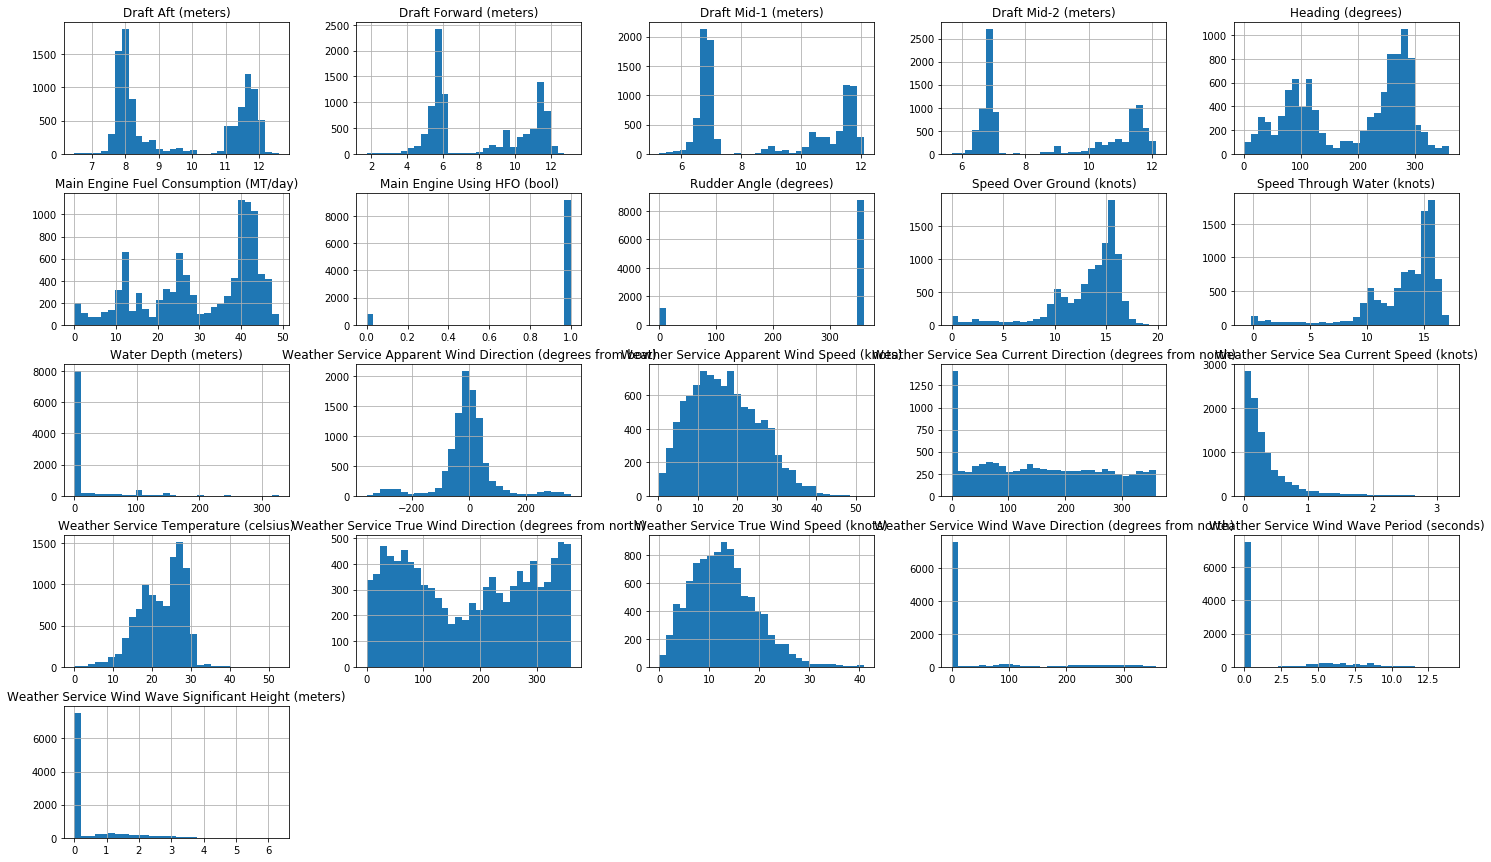

In [70]:
ship_data.hist(bins=30, figsize=(25, 15))

In [71]:
ship_data.mode(numeric_only=True)

,Main Engine Fuel Consumption (MT/day),Main Engine Using HFO (bool),Draft Forward (meters),Draft Aft (meters),Draft Mid-1 (meters),Draft Mid-2 (meters),Speed Over Ground (knots),Speed Through Water (knots),Heading (degrees),Rudder Angle (degrees),...,Weather Service Apparent Wind Direction (degrees from bow),Weather Service True Wind Speed (knots),Weather Service True Wind Direction (degrees from north),Weather Service Temperature (celsius),Weather Service Sea Current Direction (degrees from north),Weather Service Sea Current Speed (knots),Water Depth (meters),Weather Service Wind Wave Significant Height (meters),Weather Service Wind Wave Period (seconds),Weather Service Wind Wave Direction (degrees from north)
0,0.001174,1.0,1.761927,6.477834,5.264249,5.681231,0.0,0.0,318.9,0.000639,...,1.421085e-14,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002376,NaN,1.858211,6.499134,5.288590,5.711301,NaN,NaN,NaN,0.001224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.002888,NaN,1.921334,6.513336,5.289181,5.724918,NaN,NaN,NaN,0.001884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.006153,NaN,1.934600,6.517984,5.323373,5.745171,NaN,NaN,NaN,0.002285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.006918,NaN,1.953422,6.520507,5.403205,5.750690,NaN,NaN,NaN,0.002387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,48.973183,NaN,12.835796,12.476764,12.026011,12.116133,NaN,NaN,NaN,359.994729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10010,49.026281,NaN,12.905447,12.503257,12.029345,12.117138,NaN,NaN,NaN,359.996044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011,49.040624,NaN,12.975487,12.525366,12.033191,12.121665,NaN,NaN,NaN,359.997018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012,49.067334,NaN,13.073286,12.563152,12.035619,12.125208,NaN,NaN,NaN,359.998022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
ship_data.mean()

Main Engine Fuel Consumption (MT/day)                          30.560424
Main Engine Using HFO (bool)                                    0.919413
Draft Forward (meters)                                          8.022568
Draft Aft (meters)                                              9.633970
Draft Mid-1 (meters)                                            8.810299
Draft Mid-2 (meters)                                            8.819984
Speed Over Ground (knots)                                      13.212719
Speed Through Water (knots)                                    13.120171
Heading (degrees)                                             190.299748
Rudder Angle (degrees)                                        315.133197
Weather Service Apparent Wind Speed (knots)                    16.842050
Weather Service Apparent Wind Direction (degrees from bow)     -5.841660
Weather Service True Wind Speed (knots)                        12.863543
Weather Service True Wind Direction (degrees from n

In [73]:
feature_list = ship_data.columns[1:]
feature_list

Index(['Main Engine Using HFO (bool)', 'Draft Forward (meters)',
       'Draft Aft (meters)', 'Draft Mid-1 (meters)', 'Draft Mid-2 (meters)',
       'Speed Over Ground (knots)', 'Speed Through Water (knots)',
       'Heading (degrees)', 'Rudder Angle (degrees)',
       'Weather Service Apparent Wind Speed (knots)',
       'Weather Service Apparent Wind Direction (degrees from bow)',
       'Weather Service True Wind Speed (knots)',
       'Weather Service True Wind Direction (degrees from north)',
       'Weather Service Temperature (celsius)',
       'Weather Service Sea Current Direction (degrees from north)',
       'Weather Service Sea Current Speed (knots)', 'Water Depth (meters)',
       'Weather Service Wind Wave Significant Height (meters)',
       'Weather Service Wind Wave Period (seconds)',
       'Weather Service Wind Wave Direction (degrees from north)'],
      dtype='object')

In [ ]:
def train_test_data(df):
    X = ship_data.values[:,1:]
    y = ship_data.values[:,0]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    return X_train, X_test, y_train, y_test

In [74]:
X = ship_data.values[:,1:]

In [75]:
y = ship_data.values[:,0]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6709, 20)
(3305, 20)
(6709,)
(3305,)


In [78]:
myRFR = RandomForestRegressor(criterion='mse', verbose=3)

In [79]:
#myRFR_params = { 
##    'n_estimators': [50,100,200,300],
#    'max_features': ['log2'],
#    'max_depth' : [2,5,10,15,20],
#    'min_samples_split' : [2,3,4,5,10],
#    'min_samples_leaf' : [2,5,10,50]}
#myRFR_params

In [80]:
yRFR_params = {'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 2,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [81]:
rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
rf_reg.fit(X_train, y_train)
RandomForestRegressor(max_depth=2, random_state=0)

/Users/zexuanxu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [82]:
train_pred = rf_reg.predict(X_train)
test_pred = rf_reg.predict(X_test)

In [83]:
def print_statistics(train_true, train_pred, val_true, val_pred):
    print('Train')
    print('MAE:', mean_absolute_error(train_true, train_pred))
    print('MSE:', mean_squared_error(train_true, train_pred))
    print('R2:', r2_score(train_true, train_pred))
    print('Accuracy:', round(100 - np.mean(100*(train_pred-train_true) / train_true), 2), '%.')

    print('\nTest')
    print('MAE:', mean_absolute_error(val_true, val_pred))
    print('MSE:', mean_squared_error(val_true, val_pred))
    print('R2:', r2_score(val_true, val_pred))
    
    print('Accuracy:', round(100 - np.mean(100*(val_pred-val_true) / val_true), 2), '%.')


In [84]:
print_statistics(y_train, train_pred, y_test, test_pred)

Train
MAE: 3.5025641134892216
MSE: 25.42389993265738
R2: 0.8516649823840224
Accuracy: -160.65 %.

Test
MAE: 3.5169066114963763
MSE: 25.692155778210044
R2: 0.8541863571944477
Accuracy: -668.46 %.


In [85]:
# define k-fold and number of parallel jobs
nFold = 5
nJobs = 2

In [86]:
myRFR = RandomForestRegressor()

In [87]:
myRFR_params = {'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 2,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [88]:
# parameters to test in grid search / cross validation
#param_grid = { 
#    'n_estimators': [100],
#    'max_features': ['log2'],
#    'max_depth' : [2,4,6,8],
#    'min_samples_split' : [3,4,5],
#    'min_samples_leaf' : [2,5,10]}
#param_grid

In [89]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

In [90]:
myRFR_CV = GridSearchCV(estimator=myRFR, param_grid=param_grid, cv=nFold, n_jobs=nJobs, verbose=2, refit=True)
myRFR_CV.fit(X, y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   31.7s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:  6.2min
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed: 11.0min
[Parallel(n_jobs=2)]: Done 810 out of 810 | elapsed: 14.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [91]:
myRFR.fit(X, y)

/Users/zexuanxu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [92]:
train_pred = myRFR_CV.predict(X_train)
test_pred = myRFR_CV.predict(X_test)

In [93]:
pickle.dump(myRFR_CV, open("myRFR_CV_20features.sav", 'wb'))

In [94]:
loaded_model = pickle.load(open("myRFR_CV_20features.sav", 'rb'))

In [95]:
train_pred = loaded_model.predict(X_train)
test_pred = loaded_model.predict(X_test)

In [96]:
print_statistics(y_train, train_pred, y_test, test_pred)

Train
MAE: 0.688424084275389
MSE: 1.639207013802544
R2: 0.9904360935217377
Accuracy: 26.59 %.

Test
MAE: 0.6870133821891816
MSE: 1.6107233402329955
R2: 0.9908584768121913
Accuracy: -64.29 %.


In [97]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf_reg.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf_reg.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [98]:
myRFR

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [99]:
# Get numerical feature importances
importances = list(myRFR.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Speed Through Water (knots) Importance: 0.87
Variable: Weather Service Apparent Wind Speed (knots) Importance: 0.04
Variable: Draft Aft (meters)   Importance: 0.02
Variable: Speed Over Ground (knots) Importance: 0.02
Variable: Draft Forward (meters) Importance: 0.01
Variable: Draft Mid-1 (meters) Importance: 0.01
Variable: Draft Mid-2 (meters) Importance: 0.01
Variable: Weather Service Temperature (celsius) Importance: 0.01
Variable: Main Engine Using HFO (bool) Importance: 0.0
Variable: Heading (degrees)    Importance: 0.0
Variable: Rudder Angle (degrees) Importance: 0.0
Variable: Weather Service Apparent Wind Direction (degrees from bow) Importance: 0.0
Variable: Weather Service True Wind Speed (knots) Importance: 0.0
Variable: Weather Service True Wind Direction (degrees from north) Importance: 0.0
Variable: Weather Service Sea Current Direction (degrees from north) Importance: 0.0
Variable: Weather Service Sea Current Speed (knots) Importance: 0.0
Variable: Water Depth (m

In [100]:
ship_data.mean()

Main Engine Fuel Consumption (MT/day)                          30.560424
Main Engine Using HFO (bool)                                    0.919413
Draft Forward (meters)                                          8.022568
Draft Aft (meters)                                              9.633970
Draft Mid-1 (meters)                                            8.810299
Draft Mid-2 (meters)                                            8.819984
Speed Over Ground (knots)                                      13.212719
Speed Through Water (knots)                                    13.120171
Heading (degrees)                                             190.299748
Rudder Angle (degrees)                                        315.133197
Weather Service Apparent Wind Speed (knots)                    16.842050
Weather Service Apparent Wind Direction (degrees from bow)     -5.841660
Weather Service True Wind Speed (knots)                        12.863543
Weather Service True Wind Direction (degrees from n

In [47]:
X_train_mean =  X_train.mean(axis=0)
X_train_mean

array([  0.92000795,   8.04474041,   9.64961433,   8.82728173,
         8.83911024,  13.22490813,  13.13465093, 190.63023543,
        16.84779648,  -6.36406152,  22.49242135, 153.26761504,
         0.34230208])

In [48]:
X_train_stack = X_train_mean
for i in range(20):
    X_train_stack = np.vstack((X_train_stack, X_train_mean))

In [49]:
X_train_stack[:,6] = np.arange(21)

In [50]:
X_train_stack

array([[  0.92000795,   8.04474041,   9.64961433,   8.82728173,
          8.83911024,  13.22490813,   0.        , 190.63023543,
         16.84779648,  -6.36406152,  22.49242135, 153.26761504,
          0.34230208],
       [  0.92000795,   8.04474041,   9.64961433,   8.82728173,
          8.83911024,  13.22490813,   1.        , 190.63023543,
         16.84779648,  -6.36406152,  22.49242135, 153.26761504,
          0.34230208],
       [  0.92000795,   8.04474041,   9.64961433,   8.82728173,
          8.83911024,  13.22490813,   2.        , 190.63023543,
         16.84779648,  -6.36406152,  22.49242135, 153.26761504,
          0.34230208],
       [  0.92000795,   8.04474041,   9.64961433,   8.82728173,
          8.83911024,  13.22490813,   3.        , 190.63023543,
         16.84779648,  -6.36406152,  22.49242135, 153.26761504,
          0.34230208],
       [  0.92000795,   8.04474041,   9.64961433,   8.82728173,
          8.83911024,  13.22490813,   4.        , 190.63023543,
         16.

In [51]:
meta_ship_data = ship_data.describe()
meta_ship_data

,Main Engine Fuel Consumption (MT/day),Main Engine Using HFO (bool),Draft Forward (meters),Draft Aft (meters),Draft Mid-1 (meters),Draft Mid-2 (meters),Speed Over Ground (knots),Speed Through Water (knots),Heading (degrees),Weather Service Apparent Wind Speed (knots),Weather Service Apparent Wind Direction (degrees from bow),Weather Service Temperature (celsius),Weather Service Sea Current Direction (degrees from north),Weather Service Sea Current Speed (knots)
count,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000
mean,30.560424,0.919413,8.022568,9.633970,8.810299,8.819984,13.212719,13.120171,190.299748,16.842050,-5.841660,22.438585,153.688366,0.341314
std,13.152861,0.271246,2.734483,1.792369,2.235687,2.218940,3.483850,3.474975,96.008816,8.674009,94.227307,5.748335,111.398251,0.418128
min,0.001174,0.000000,1.761927,6.477834,5.264249,5.681231,0.000000,-0.812132,0.705932,0.216047,-358.561592,0.000000,0.000000,0.000000
25%,21.228755,1.000000,5.713989,7.962960,6.799900,6.816719,11.809185,11.849729,97.001101,10.135447,-37.221029,18.397341,54.072124,0.089921
50%,35.426577,1.000000,6.074896,8.652402,7.073106,7.091814,14.346252,14.271563,228.572952,16.158046,-4.529391,23.592971,145.811800,0.207312
75%,41.890374,1.000000,11.161306,11.618669,11.438441,11.381564,15.539366,15.428801,275.088673,22.975407,28.511389,27.046485,248.452584,0.422307
max,49.090823,1.000000,13.136587,12.589208,12.076237,12.127948,19.844884,17.186902,359.639788,51.955335,358.000339,52.559168,359.999716,3.184603


In [52]:
meta_ship_data.iloc[1:8,0]

mean    30.560424
std     13.152861
min      0.001174
25%     21.228755
50%     35.426577
75%     41.890374
max     49.090823
Name: Main Engine Fuel Consumption (MT/day), dtype: float64

In [53]:
#ship_data.mean()

In [54]:

meta_ship_data.index[2]

'std'

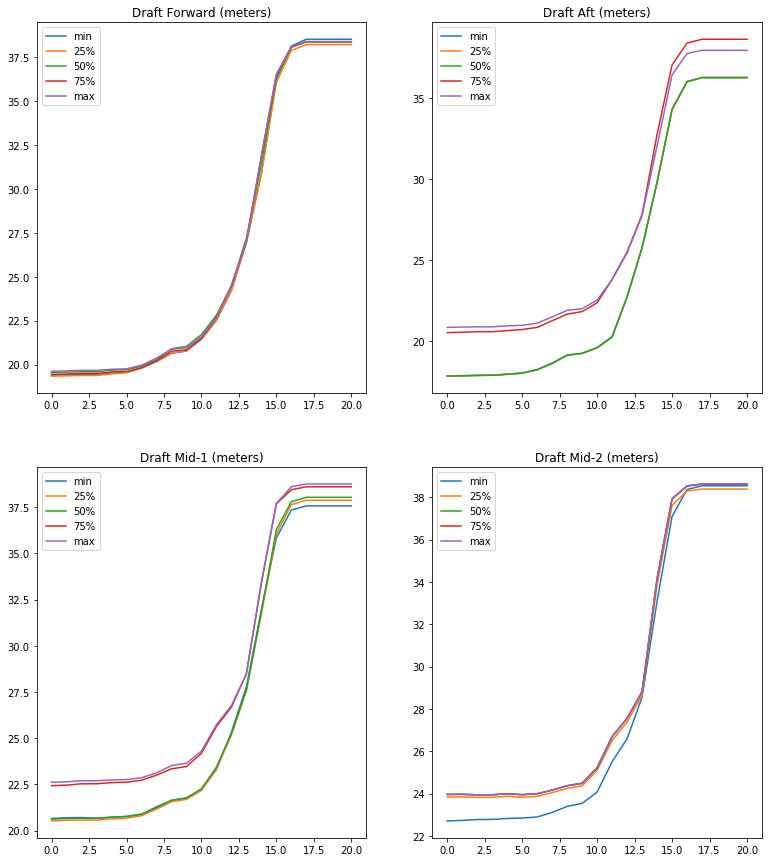

In [55]:
fig = plt.figure(figsize=(13,15))

x = range(21)
for k in range(4):
    fig.add_subplot(2,2,k+1)
    for i, value in enumerate(meta_ship_data.iloc[3:8,k+3]):
        X_train_plot = X_train_stack
        X_train_plot[:,k+1] = value
        plt.plot(x, myRFR_CV.predict(X_train_plot),label=meta_ship_data.index[i+3])
        plt.title(meta_ship_data.columns[k+2])
        plt.xlabel = "Speed Over Water (knots)"
        plt.ylabel = "Main Engine Fuel Consumption (MT/day)"
    plt.legend()
plt.savefig("fuel_speed_draft.png")             
        

In [56]:
meta_ship_data.columns 

Index(['Main Engine Fuel Consumption (MT/day)', 'Main Engine Using HFO (bool)',
       'Draft Forward (meters)', 'Draft Aft (meters)', 'Draft Mid-1 (meters)',
       'Draft Mid-2 (meters)', 'Speed Over Ground (knots)',
       'Speed Through Water (knots)', 'Heading (degrees)',
       'Weather Service Apparent Wind Speed (knots)',
       'Weather Service Apparent Wind Direction (degrees from bow)',
       'Weather Service Temperature (celsius)',
       'Weather Service Sea Current Direction (degrees from north)',
       'Weather Service Sea Current Speed (knots)'],
      dtype='object')

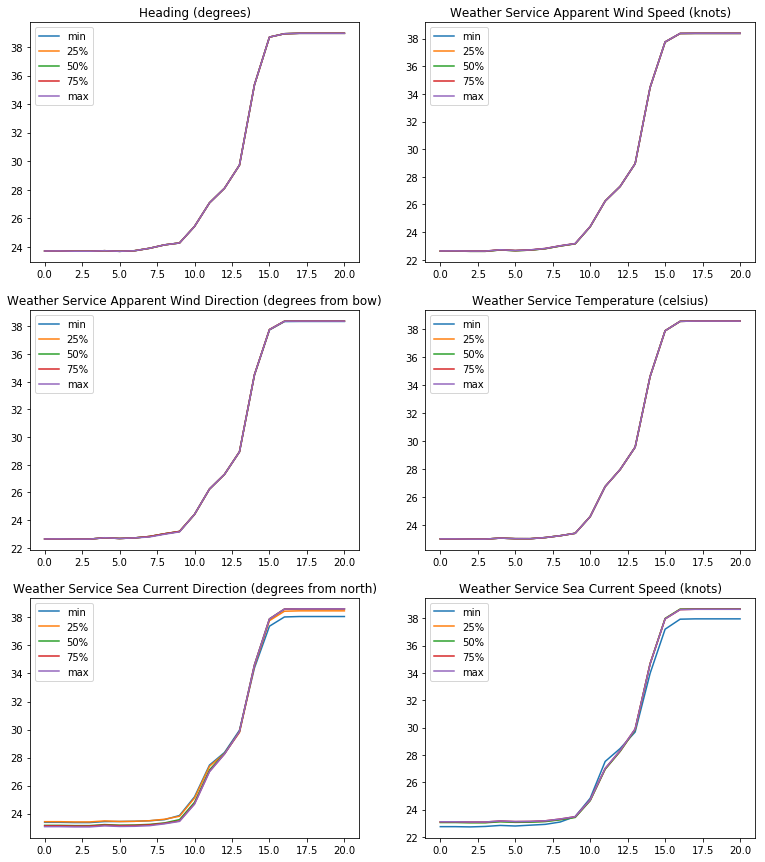

In [57]:
fig = plt.figure(figsize=(13,15))

x = range(21)
for k in range(6):
    fig.add_subplot(3,2,k+1)
    for i, value in enumerate(meta_ship_data.iloc[3:8,k+8]):
        X_train_plot = X_train_stack
        X_train_plot[:,k+7] = i
        plt.plot(x, myRFR_CV.predict(X_train_plot),label=meta_ship_data.index[i+3])
        plt.title(meta_ship_data.columns[k+8])
        plt.xlabel = "Speed Over Water (knots)"
        plt.ylabel = "Main Engine Fuel Consumption (MT/day)"
    plt.legend()
plt.savefig("fuel_speed_environmental.png")